In [1]:
from foggie.utils.foggie_load import *
from foggie.utils.consistency import *
from foggie.clumps.clump_finder import *

In [2]:
code_dir = '/Users/ctrapp/Documents/GitHub/foggie/foggie/'
data_dir = '/Volumes/FoggieCam/foggie_halos/'

halo_id = "008508";snapnum = "RD0042"; ##Tempest
run="nref11c_nref9f"

snap_name = data_dir + "halo_"+halo_id+"/"+run+"/"+snapnum+"/"+snapnum
trackname = code_dir+"/halo_tracks/"+halo_id+"/nref11n_selfshield_15/halo_track_200kpc_nref9"
halo_c_v_name = code_dir+"/halo_infos/"+halo_id+"/"+run+"/halo_c_v"

particle_type_for_angmom = 'gas' #Should be defined by gas with Temps below 1e4 K

catalog_dir = code_dir + '/halo_infos/' + halo_id + '/'+run+'/'
#smooth_AM_name = catalog_dir + 'AM_direction_smoothed'
smooth_AM_name = None

ds, refine_box = foggie_load(snap_name, trackfile_name=trackname, halo_c_v_name=halo_c_v_name, do_filter_particles=True,disk_relative=True,particle_type_for_angmom=particle_type_for_angmom,smooth_AM_name = smooth_AM_name)

print("Current time = ",ds.current_time)
print("Current redshift = ",ds.current_redshift)

yt : [INFO     ] 2025-12-15 16:45:07,897 Parameters: current_time              = 639.44480357087
yt : [INFO     ] 2025-12-15 16:45:07,897 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2025-12-15 16:45:07,897 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-12-15 16:45:07,897 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-12-15 16:45:07,898 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2025-12-15 16:45:07,898 Parameters: current_redshift          = 0
yt : [INFO     ] 2025-12-15 16:45:07,898 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2025-12-15 16:45:07,898 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2025-12-15 16:45:07,898 Parameters: omega_radiation           = 0
yt : [INFO     ] 2025-12-15 16:45:07,899 Parameters: hubble_constant           = 0.695


Opening snapshot /Volumes/FoggieCam/foggie_halos/halo_008508/nref11c_nref9f/RD0042/RD0042


Parsing Hierarchy : 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4251/4251 [00:00<00:00, 25019.59it/s]
yt : [INFO     ] 2025-12-15 16:45:08,117 Gathering a field list (this may take a moment.)


get_refine_box: using this location:         col1          col2     col3     col4    col5     col6     col7  col8
------------------- -------- -------- ------- -------- -------- ------- ----
4.4408920985006e-16 0.488865 0.470316 0.50854 0.490865 0.472316 0.51054    9
Will look for halo_c_v_file:  /Users/ctrapp/Documents/GitHub/foggie/foggie//halo_infos/008508/nref11c_nref9f/halo_c_v
Found halo_c_v file: /Users/ctrapp/Documents/GitHub/foggie/foggie//halo_infos/008508/nref11c_nref9f/halo_c_v
Using halo_c_v catalog file:  /Users/ctrapp/Documents/GitHub/foggie/foggie//halo_infos/008508/nref11c_nref9f/halo_c_v  for center style  catalog
Pulling halo center from catalog file
halo center in kpc:  [70482.02075547 67798.01073692 73316.14871677] kpc
halo velocity in km/s:  [ -32.94971619 -152.94040614   63.25068123] km/s
ds.halo_velocity_kms =  [ -32.94971619 -152.94040614   63.25068123] km/s  so we can add the centered velocity and energy fields
filtering young_stars particles...
filtering youn

In [3]:
#### Find the Disk ####
#### For tempest at z=0 takes around 1 min on macbook M4-Max (16 cores, 4.51 GHz clock speed)

### Default disk definition FOGGIE XII/XIII (Trapp+25a,b) as follows:
### See ModularUseExample.ipynb in the clump_finder directory for more examples
disk_output = "/Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest"
disk = disk_finder(ds,refine_box,disk_output)

yt : [WARNING  ] 2025-12-15 16:45:09,433 Field ('gas', 'H_p0_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2025-12-15 16:45:09,433 Field ('gas', 'H_p0_density') already exists. Not clobbering.
yt : [WARNING  ] 2025-12-15 16:45:09,433 Field ('gas', 'H_p0_mass') already exists. Not clobbering.
/Users/ctrapp/Documents/GitHub/foggie/foggie/clumps/clump_finder/utils_clump_finder.py:202: RuntimeWarning: invalid value encountered in cast
  u_id = np.round(gids + np.multiply(c_ids , max_gid+1)).astype(np.uint64)


Clump min was set to None
Rvir set to: 168.34407792499337
cgm_density_cut was: 0.0064815585799999995 cm**(-3) stdv= 3.357872366820426e-05 cm**(-3)
cgm_density_cut= 0.009839430946820426 cm**(-3) clump_max= 24.282430865535172 cm**(-3) min_val= 8.53247328094966e-16 cm**(-3)
n_levels= 1
Defining disk ucgs...
YTRegion (RD0042): , center=[2.17491431e+26 2.09256002e+26 2.26226785e+26] cm, left_edge=[2.17047449e+26 2.08812020e+26 2.25782802e+26] cm, right_edge=[2.17935414e+26 2.09699985e+26 2.26670767e+26] cm
dx_uniform= 1.9073486328125e-06 code_length
data_source_left_edge= [unyt_quantity(0.48886871, 'code_length'), unyt_quantity(0.47031403, 'code_length'), unyt_quantity(0.50853729, 'code_length')]
data_source_right_edge= [unyt_quantity(0.49086761, 'code_length'), unyt_quantity(0.47231293, 'code_length'), unyt_quantity(0.51053619, 'code_length')]


yt : [WARNING  ] 2025-12-15 16:45:24,402 Field ('index', 'cell_id_2') was added without specifying units or dimensions, auto setting units to 'dimensionless'


ucg_list: nan nan
Iterating for clump threshold= 0.009839430946820426 cm**(-3)
Marching cubes...
Time to march cubes linearly= 6.771314859390259
Updating clump catalog...
Determining disk object based on mass
For clump 1 current_max set to 0.21264299516834384
For clump 7 current_max set to 24607.499300084615
disk_label set to: 7
Cataloging and filling in disk...
Disk label is 7
Void filling filled 33 cells in 3d cavities.
Binary closing filled 278964 cells.
Void filling after binary closing filled 0 cells in 3d cavities.
Saving filled holes at /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest_FilledDiskHoles.h5
Saving clump at /Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest_Disk.h5
For 15 threads total time= 102.65813207626343


In [4]:
from foggie.clumps.clump_finder.load_subsampled_ucgs import *
import unyt

disk_output = "/Users/ctrapp/Documents/foggie_analysis/disk_project/clump_outputs/NotebookTest"
disk_file = disk_output+"_Disk.h5"

Rvir = read_virial_mass_file(halo_id, snapnum, run,code_dir)
Rvir = Rvir*unyt.kpc

left_edge  = ds.halo_center_kpc - Rvir
right_edge =  ds.halo_center_kpc + Rvir

x_right = right_edge[0]
y_right = right_edge[1]
z_right = right_edge[2]

x_left = left_edge[0]
y_left = left_edge[1]
z_left = left_edge[2]
    
virial_box = ds.r[x_left:x_right, y_left:y_right, z_left:z_right]

#This loads the disk mask into a ucg at max_refinement_level = 11, subsamples the ucg to target_refinement_level = 9, and then puts it in a ucg the size of the cut_region
subsampled_disk_mask = load_subsampled_disk_mask(ds, refine_box, disk_file, target_refinement_level=9, cut_region = virial_box, max_refinement_level = 11)



YTRegion (RD0042): , center=[2.17491431e+26 2.09256002e+26 2.26226785e+26] cm, left_edge=[2.17047449e+26 2.08812020e+26 2.25782802e+26] cm, right_edge=[2.17935414e+26 2.09699985e+26 2.26670767e+26] cm
dx_uniform= 1.9073486328125e-06 code_length
data_source_left_edge= [unyt_quantity(0.48886871, 'code_length'), unyt_quantity(0.47031403, 'code_length'), unyt_quantity(0.50853729, 'code_length')]
data_source_right_edge= [unyt_quantity(0.49086761, 'code_length'), unyt_quantity(0.47231293, 'code_length'), unyt_quantity(0.51053619, 'code_length')]
ucg_list: 0 80820059
cell_id_ucg shape is (1048, 1048, 1048)
target_dx=  1.09775460881295
cr_ledge=  [array(70313.37820369), array(67630.46593975), array(73145.58509442)]
cr_redge=  [array(70651.4866232), array(67966.37885004), array(73488.08453237)]
rb_ledge=  [array(70340.82206891), array(67671.08286027), array(73170.83345043)]
rb_redge=  [array(70628.43377642), array(67958.69456778), array(73458.44515794)]
target_cut_region_shape= [308 306 312]
Sh

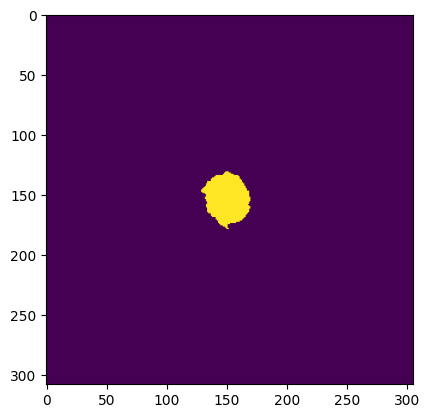

In [5]:
#Display the mask out to the virial radius
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(np.sum(subsampled_disk_mask,axis=2).astype(bool).astype(int))
plt.show()

In [6]:
#Load in density into an nref9 ucg
from foggie.clumps.clump_finder.load_subsampled_ucgs import *
import unyt

Rvir = read_virial_mass_file(halo_id, snapnum, run,code_dir)
Rvir = Rvir*unyt.kpc

left_edge  = ds.halo_center_kpc - Rvir
right_edge =  ds.halo_center_kpc + Rvir

x_right = right_edge[0]
y_right = right_edge[1]
z_right = right_edge[2]

x_left = left_edge[0]
y_left = left_edge[1]
z_left = left_edge[2]
    
virial_box = ds.r[x_left:x_right, y_left:y_right, z_left:z_right]

fields = ['density']
#density_ucg = load_field_into_subsampled_ucg(ds, virial_box, fields, target_refinement_level=9, max_refinement_level = 11, split_methods=["copy"], merge_methods=["mean"]) #This version loads into nref11 first
density_ucg = load_field_into_subsampled_ucg_2(ds, virial_box, fields, target_refinement_level=9, max_refinement_level = 11, split_methods=["copy"], merge_methods=["mean"])






Fields= ['density']
max_refinement_level= 11
YTRegion (RD0042): , center=[2.17484791e+26 2.09202802e+26 2.26229996e+26] cm, left_edge=[2.16965336e+26 2.08683346e+26 2.25710541e+26] cm, right_edge=[2.18004247e+26 2.09722257e+26 2.26749452e+26] cm
dx_uniform= 3.814697265625e-06 code_length
data_source_left_edge= [unyt_quantity(0.48867798, 'code_length'), unyt_quantity(0.47003174, 'code_length'), unyt_quantity(0.50836182, 'code_length')]
data_source_right_edge= [unyt_quantity(0.49102783, 'code_length'), unyt_quantity(0.47236633, 'code_length'), unyt_quantity(0.51074219, 'code_length')]
ucg_list: 1.583649544558707e-31 1.4593404998357032e-23


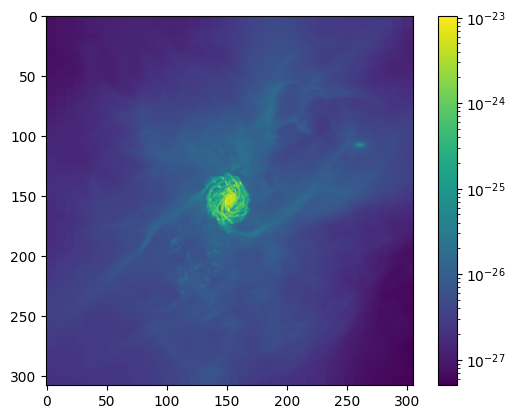

(1, 308, 306, 312)
(308, 306, 312)


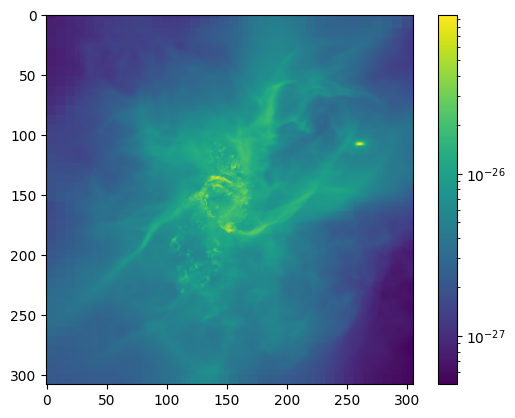

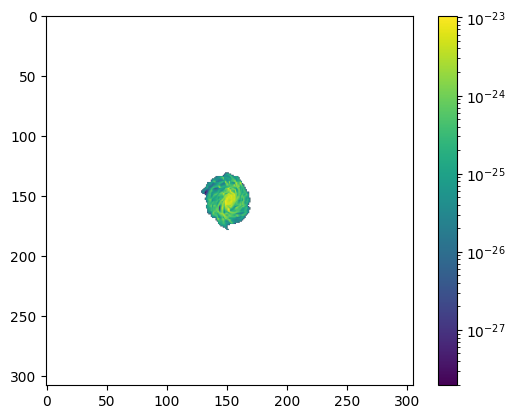

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure()
plt.imshow(np.sum(density_ucg[0],axis=2),norm=LogNorm())
plt.colorbar()
plt.show()


print(np.shape(density_ucg))
print(np.shape(subsampled_disk_mask))

plt.figure()
to_plot = np.copy(density_ucg[0])
to_plot[subsampled_disk_mask] = 0
plt.imshow(np.sum(to_plot,axis=2),norm=LogNorm())
plt.colorbar()
plt.show()

plt.figure()
to_plot = np.copy(density_ucg[0])
to_plot[~subsampled_disk_mask] = 0 
plt.imshow(np.sum(to_plot,axis=2),norm=LogNorm())
plt.colorbar()
plt.show()

In [8]:
#Example of loading in a weighted mean
from foggie.clumps.clump_finder.load_subsampled_ucgs import *
import unyt

Rvir = read_virial_mass_file(halo_id, snapnum, run,code_dir)
Rvir = Rvir*unyt.kpc

left_edge  = ds.halo_center_kpc - Rvir
right_edge =  ds.halo_center_kpc + Rvir

x_right = right_edge[0]
y_right = right_edge[1]
z_right = right_edge[2]

x_left = left_edge[0]
y_left = left_edge[1]
z_left = left_edge[2]
    
virial_box = ds.r[x_left:x_right, y_left:y_right, z_left:z_right]


fields = ['pressure']
weight_field = "mass"
weight_merge_method = "sum"
pressure_ucg = load_field_into_subsampled_ucg_2(ds, virial_box, fields, target_refinement_level=9, max_refinement_level = 11, split_methods=["copy"], merge_methods=["weighted_mean"],weight_field=weight_field,weight_merge_method=weight_merge_method)


Fields= ['pressure']
max_refinement_level= 11
YTRegion (RD0042): , center=[2.17484791e+26 2.09202802e+26 2.26229996e+26] cm, left_edge=[2.16965336e+26 2.08683346e+26 2.25710541e+26] cm, right_edge=[2.18004247e+26 2.09722257e+26 2.26749452e+26] cm
dx_uniform= 3.814697265625e-06 code_length
data_source_left_edge= [unyt_quantity(0.48867798, 'code_length'), unyt_quantity(0.47003174, 'code_length'), unyt_quantity(0.50836182, 'code_length')]
data_source_right_edge= [unyt_quantity(0.49102783, 'code_length'), unyt_quantity(0.47236633, 'code_length'), unyt_quantity(0.51074219, 'code_length')]
ucg_list: 1.8111063628599735e-18 2.5034221884374727e-11
YTRegion (RD0042): , center=[2.17484791e+26 2.09202802e+26 2.26229996e+26] cm, left_edge=[2.16965336e+26 2.08683346e+26 2.25710541e+26] cm, right_edge=[2.18004247e+26 2.09722257e+26 2.26749452e+26] cm
dx_uniform= 3.814697265625e-06 code_length
data_source_left_edge= [unyt_quantity(0.48867798, 'code_length'), unyt_quantity(0.47003174, 'code_length'), u

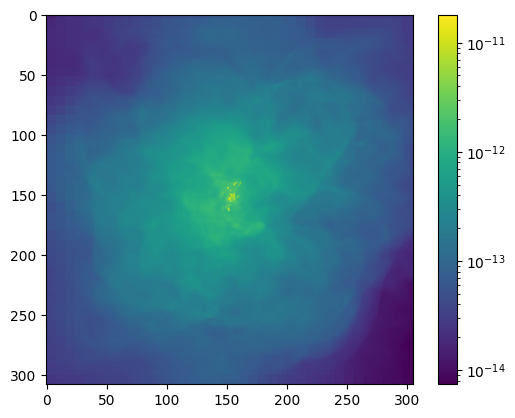

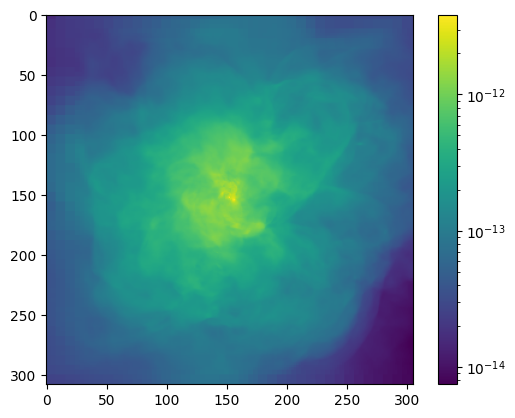

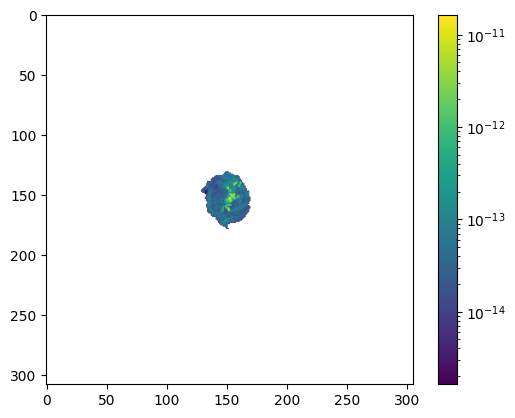

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.figure()
plt.imshow(np.sum(pressure_ucg[0],axis=2),norm=LogNorm())
plt.colorbar()
plt.show()


plt.figure()
to_plot = np.copy(pressure_ucg[0])
to_plot[subsampled_disk_mask] = 0
plt.imshow(np.sum(to_plot,axis=2),norm=LogNorm())
plt.colorbar()
plt.show()

plt.figure()
to_plot = np.copy(pressure_ucg[0])
to_plot[~subsampled_disk_mask] = 0 
plt.imshow(np.sum(to_plot,axis=2),norm=LogNorm())
plt.colorbar()
plt.show()